In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

# Q5) What is the relationship between store trading duration and revenue?

Store trading duration: The length of time a shop has been actively conducting sales. We measured this by taking the difference from the first sale and last sale to provide insight into how long each store has been serving its customers.

In [2]:
df = pd.read_csv(r"C:\Users\sebsj\Documents\Computer Science\GenerationDataAnalyst\InterimProject\analysis\Q5_data.csv")
df.head()

,StoreName,TerritoryID,CountryRegionCode,name,TradingDurationInDays,TradingDurationInYears,TotalSales
0,Brakes and Gears,1,US,Northwest,1004,2.750684,989184.0820
1,Excellent Riding Supplies,5,US,Southeast,1004,2.750684,961675.8596
2,Vigorous Exercise Company,6,CA,Canada,1004,2.750684,954021.9235
3,Totes & Baskets Company,4,US,Southwest,1004,2.750684,919801.8188
4,Retail Mall,6,CA,Canada,1005,2.753424,901346.8560


In [3]:
df["SalesPerDay"] = df["TotalSales"] / df["TradingDurationInDays"]
df.head()

,StoreName,TerritoryID,CountryRegionCode,name,TradingDurationInDays,TradingDurationInYears,TotalSales,SalesPerDay
0,Brakes and Gears,1,US,Northwest,1004,2.750684,989184.0820,985.243110
1,Excellent Riding Supplies,5,US,Southeast,1004,2.750684,961675.8596,957.844482
2,Vigorous Exercise Company,6,CA,Canada,1004,2.750684,954021.9235,950.221039
3,Totes & Baskets Company,4,US,Southwest,1004,2.750684,919801.8188,916.137270
4,Retail Mall,6,CA,Canada,1005,2.753424,901346.8560,896.862543


## Scatter plot and Correlation

In [20]:
df_avg_trading_dur = df.groupby("TradingDurationInDays")["SalesPerDay"].mean().reset_index()
df_avg_trading_dur.dropna(inplace=True)
df_avg_trading_dur.head()

,TradingDurationInDays,SalesPerDay
1,89,21.583135
2,90,12.369644
3,91,13.464329
4,92,27.544248
5,181,28.719212


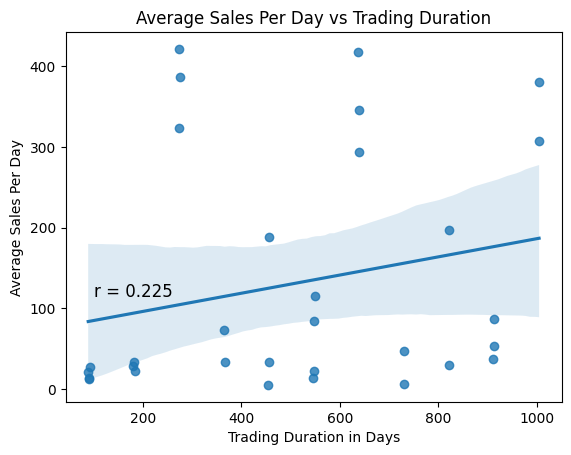

In [30]:
fig, ax = plt.subplots()

# Use seaborn scatterplot with hue parameter to change color based on "CountryRegionCode"
scatter = sns.regplot(data=df_avg_trading_dur,
                          x="TradingDurationInDays",
                          y="SalesPerDay")
ax.set(xlabel="Trading Duration in Days",
       ylabel="Average Sales Per Day",
       title="Average Sales Per Day vs Trading Duration")
plt.text(100, 110, 'r = 0.225', fontsize=12, ha='left', va='bottom', color='black')
plt.show()


Sometimes it is useful to draw a best fit line, but this is not one of those situations. It is obvious from the scatterplot that the relationship between trading duration and average sales per day is weakly positive.

In [22]:
stats.pearsonr(df_avg_trading_dur["TradingDurationInDays"],
               df_avg_trading_dur["SalesPerDay"])

PearsonRResult(statistic=0.22544793681527714, pvalue=0.22268021032551247)

Pearson's r = 0.225
P value = 0.223 - the probability that the true value of r is zero (no correlation)
The correlation coefficient demonstrates very little relationship between average sales per day and trading duration. The p-value is 0.22 which means we cannot reject the null hypothesis which is greater than the typical significance level of 0.05, we fail to reject the null hypothesis, indicating there is insufficient evidence to conclude a correlation between the variables.